In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection as model_selection
import sklearn.preprocessing as preproc
from keras.utils import to_categorical

Using TensorFlow backend.


In [82]:
dat = pd.read_csv("tic_date_emb_label.csv")

In [83]:
dat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,100,101,102
0,0,GOOGL,2016-08-22,-1.733884,-0.921825,1.429187,1.680829,-1.369395,1.166707,0.725475,...,-0.424196,1.184720,1.732774,1.885180,-0.250662,0.338028,-1.743681,0.234807,0.253199,0
1,1,MSFT,2014-07-29,-0.356478,-0.576423,-0.474687,0.661476,0.429892,0.293570,-0.883455,...,-1.036471,0.193745,-0.445431,0.018432,-0.007535,0.536937,-0.336640,-1.218299,0.401855,0
2,2,IBM,2013-11-14,0.827591,-0.461297,0.495272,-0.159535,-0.971966,-1.067975,-1.011068,...,-0.553875,-0.195722,-1.446383,0.653116,0.068910,0.629968,0.713608,-0.282490,-0.512729,1
3,3,MSFT,2015-08-20,0.033768,0.028286,-1.223439,-0.869134,0.059433,0.552658,-2.039931,...,-1.418052,-1.286848,0.455017,-0.507450,1.462569,-0.568458,-0.472113,0.000479,1.610240,0
4,4,MSFT,2016-12-20,-1.437074,-1.608165,-0.581954,-1.303739,1.081447,0.349383,0.474635,...,-1.400516,1.226679,-1.036055,-1.172877,0.653061,0.783887,-0.770354,-0.650160,-1.005733,0


In [211]:
x = np.array(dat.iloc[:, 3:103])
y = np.array(dat.iloc[:, 103])

In [212]:
# scale and split
x = preproc.scale(x, axis = 1)
x = x.reshape(x.shape[0], 10, 10)
y = to_categorical(y)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.25)

In [221]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
from keras.layers.convolutional import Conv2D

In [222]:
# create the model
model = Sequential()
model.add(LSTM(48, input_shape = x_train.shape[1:]))
model.add(Dropout(0.8))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_57 (LSTM)               (None, 48)                11328     
_________________________________________________________________
dropout_56 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 2)                 98        
Total params: 11,426
Trainable params: 11,426
Non-trainable params: 0
_________________________________________________________________


In [223]:
# Fit the model
history = model.fit(x_train, y_train,
          validation_data = (x_test, y_test),
          epochs = 40, 
          batch_size = 64)

Train on 2087 samples, validate on 696 samples
Epoch 1/40
2087/2087 [==============================] - 4s - loss: 0.7033 - acc: 0.5228 - val_loss: 0.6981 - val_acc: 0.4828

In [224]:
val_loss = history.history['val_loss']
loss = history.history['loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

In [225]:
import matplotlib.pyplot as plt

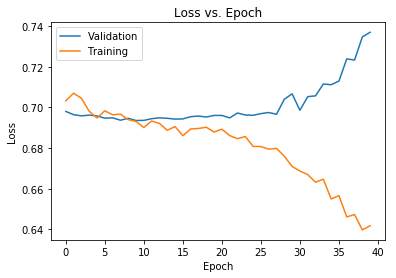

In [239]:
plt.plot(val_loss, label = "Validation")
plt.plot(loss, label = "Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend()
plt.show()

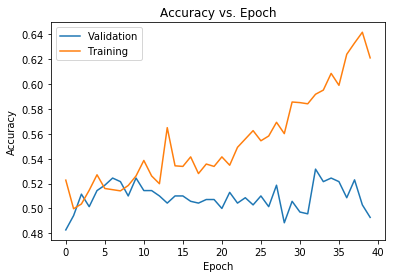

In [238]:
plt.plot(val_acc, label = "Validation")
plt.plot(acc, label = "Training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epoch")
plt.legend()
plt.show()